# Logistic regression

In [1]:
#!coding:utf-8

import math
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
start = time.time()

## Prepare dataset -- data_nonreg.txt

In [3]:
def load_data():
    df=pd.read_table('reg_data.txt',
                     names=['feature1','feature2','label'],
                     sep=',',
                     encoding='utf-8')
    df1 = df[df['label'] == 0]
    df2 = df[df['label'] == 1]
    print("This is an imbalanced data set which has\n" +str(len(df1))+" negative samples and "+str(len(df2))+" positive samples\n")
    return df, df1, df2

# Divide the dataset into a training set and a testing set
def prepare_dataset(dt):
    train = dt[10:100]
    test = dt[0:10]
    
    tr = np.array(train)
    te = np.array(test)
    return tr, te

## Sigmoid function

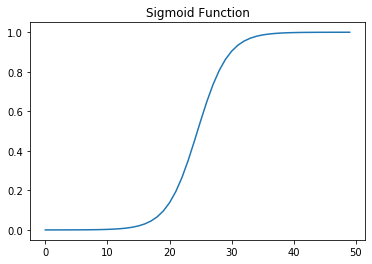

In [4]:
# sigmoid function
def sigmoid(a):
    b = 1/(1+np.exp(-a))
    return b

arr = np.linspace(-10,10,50)
vis = sigmoid(arr)
plt.title('Sigmoid Function')
plt.plot(vis)
plt.show()

## Train -- Gradient Descent

In [5]:
def gradient_des_revisedbyrain(tr):
    
    # Learning rate
    lr = 0.1
    
    # Maximum number of iterations
    iteration_max = 700000

    m, n = tr.shape
    tr_label = tr[:,2].reshape(m,1)
    
    # Fill the weight vector with ones
    result = np.ones((1, n))
    one = np.ones((m, 1))
    
    beta = np.c_[np.mat(tr[:, 0:2]),one]
    
    w_all = []
    # Iterations
    # Matrix form -- Δ = X^T * (X * w - y)
    
    for i in range(iteration_max):
        h = sigmoid(np.dot(beta, result.T))
    #     print(h.shape)
        err = h - tr_label
    #     print(err.shape)
        result = result - lr * np.dot(err.T, beta)/len(tr_label)
    #     print(result.shape)
        w_all.append(result)
    
    return result, w_all

## Calculate the accuracy

In [6]:
def accuracy(te, te_label, w, threshold):
    
    one = np.ones((len(te), 1))
    mat = np.c_[te, one]
    y = sigmoid(np.dot(mat, w.T))
    m, n = np.shape(y)

    count = 0
    flag = []
    for i in range(m):
        if y[i, 0] > threshold:
            flag.append(1)
        else:
            flag.append(0)
            
        if te_label[i] == flag[i]:
            count += 1
            
        acc = count/len(flag)
    return acc, flag
    

## Print results

In [7]:
def print_results(w, b, lb, acc):
    print('Weight vector is\n' ,w[0,0:2])
    print('Bias is\n' ,b)
    print('Accuracy on testing set: %f' %acc)
    

## Performance measure

In [8]:
def performance_measure(lb, truelabel):
    
    tp = np.zeros((len(lb),1),dtype = int)
    fp = np.zeros((len(lb),1),dtype = int)
    tn = np.zeros((len(lb),1),dtype = int)
    fn = np.zeros((len(lb),1),dtype = int)
    
    for i in range(len(lb)):
        for j in range(10):

            if truelabel[j] == 1 and lb[i][j] == 1:
                tp[i] += 1        # True positive
            elif truelabel[j] == 1 and lb[i][j] == 0:
                fn[i] += 1        # False negative
            elif truelabel[j] == 0 and lb[i][j] == 1:
                fp[i] += 1        # False positive
            elif truelabel[j] == 0 and lb[i][j] == 0:
                tn[i] += 1        # True negative
                
    return tp, fn, fp, tn

## Main

This is an imbalanced data set which has
40 negative samples and 60 positive samples

Weight vector is
 [[13.77600808 13.84949256]]
Bias is
 -12.6761096332249
Accuracy on testing set: 0.900000


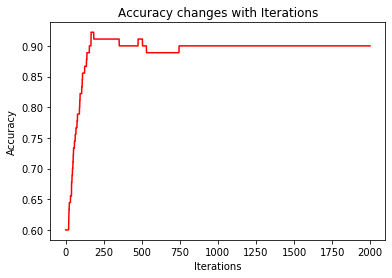

In [9]:

if __name__ == '__main__':

    data, data_label0, data_label1 = load_data()
    
    # Normalize
    for i in ['feature1', 'feature2']:
        data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min()) 
    
    training_set, testing_set = prepare_dataset(data)
    
    w_b,w_all = gradient_des_revisedbyrain(training_set)
    # w_b is the result of weight vector and bias value
    # w_all is all the weight and bias of iterations from 0 to max

    weight = w_b[0:2]
    bias = w_b[0,2]
    
    label_all = []
    acc_train =[]
    label_alltrain = []
    label_alltrain_measure = []
    
    # Accuracy on training set
    for i in range(0,2000):
        
        # Fix the threshold to be 0.5 and change weight vectors
        acc_rate_train, label_train = accuracy(training_set[:, 0:2], training_set[:,2], w_all[4*i], 0.5)
        acc_train.append(acc_rate_train)
        label_alltrain.append(label_train)
    
    
    # Different thresholds
    ran = np.arange(0, 1, 0.01)
    for i in ran:
        # Set threshold
        threshold = i
        
        # Accuracy and labels on testing set
        acc_rate, label = accuracy(testing_set[:, 0:2], testing_set[:,2], w_b, threshold)
        label_all.append(label)
        
        # Accuracy and labels on training set
        acc_rate_train_measure, label_train_measure = accuracy(training_set[:, 0:2], training_set[:,2], w_b, threshold)
        label_alltrain_measure.append(label_train_measure)
        
        # Accuracy and labels on testing set when threshold is 0.5
        final_acc_rate, final_label = accuracy(testing_set[:, 0:2], testing_set[:,2], w_b, 0.5)
        
    print_results(weight, bias, final_label, final_acc_rate)
    plt.plot(acc_train,c = 'r')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.title('Accuracy changes with Iterations')
    plt.show()

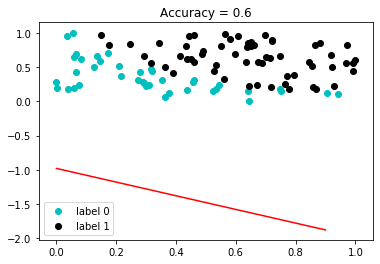

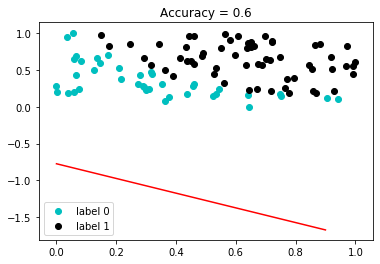

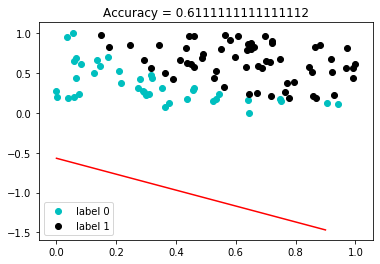

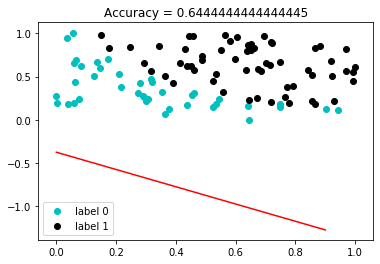

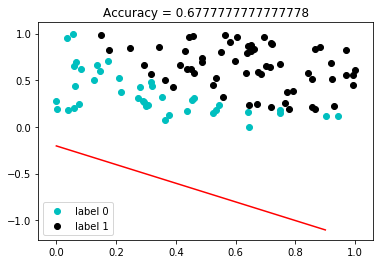

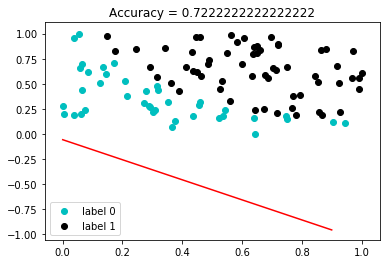

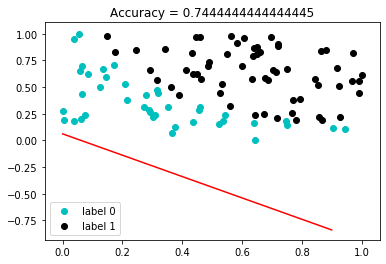

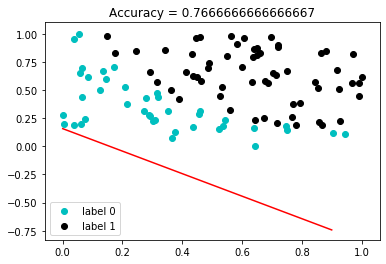

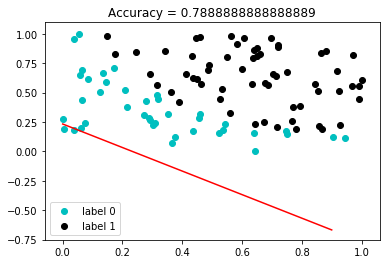

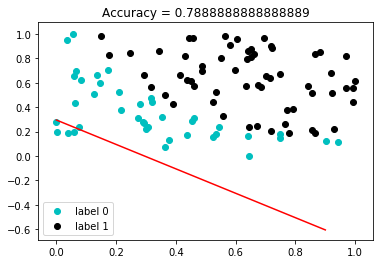

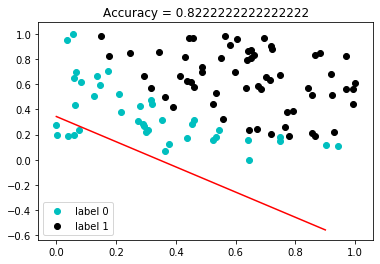

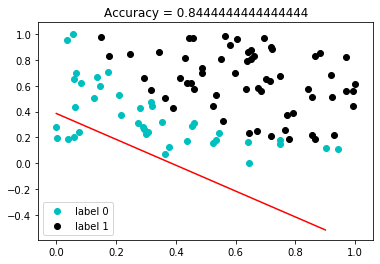

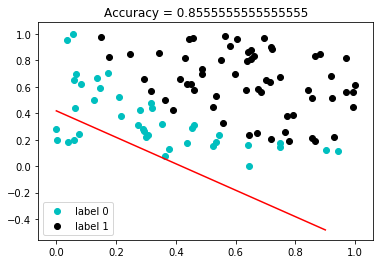

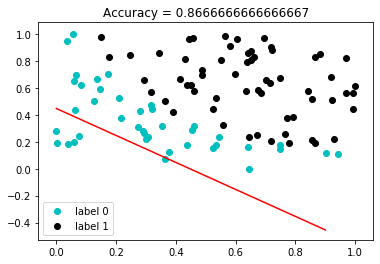

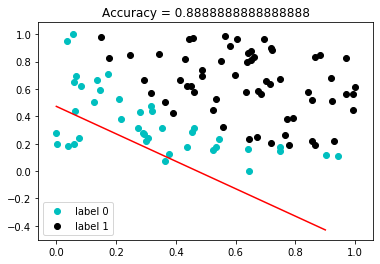

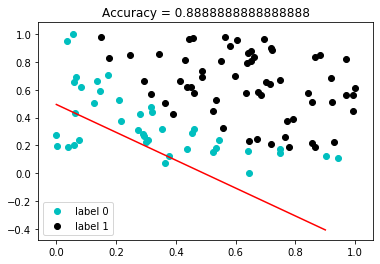

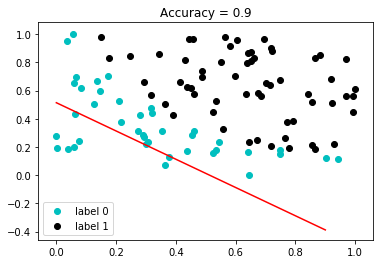

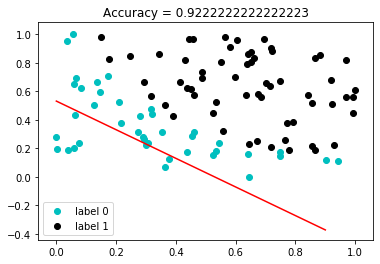

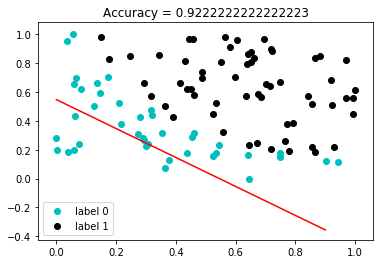

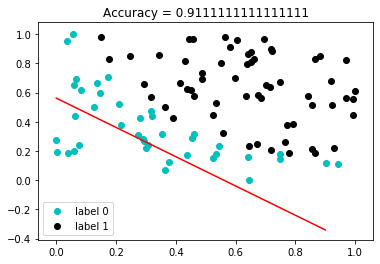

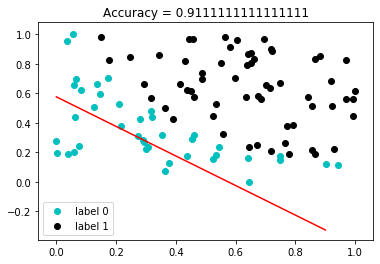

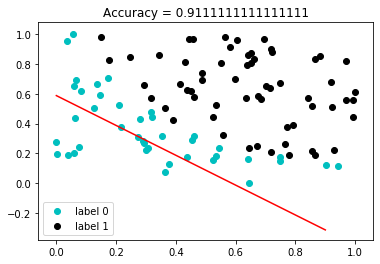

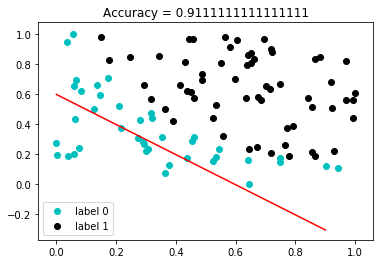

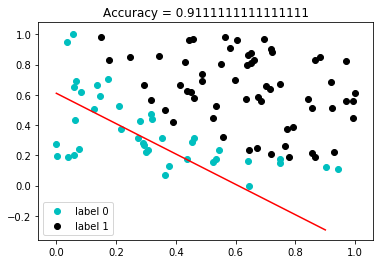

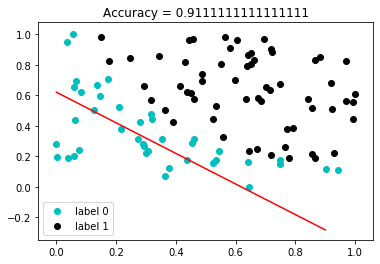

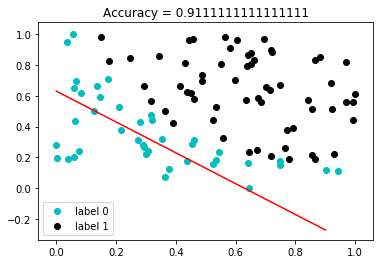

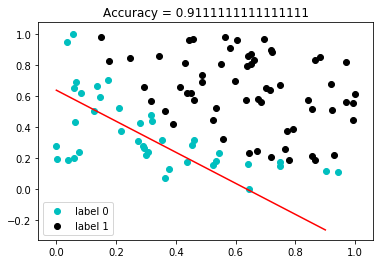

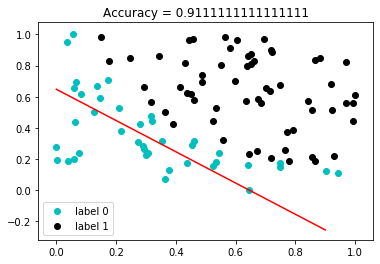

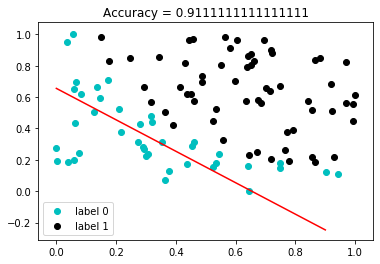

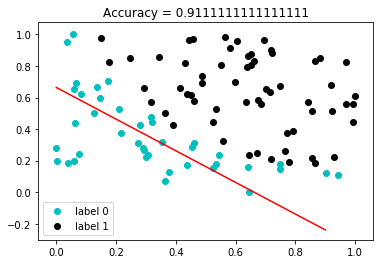

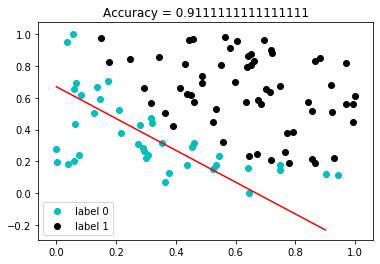

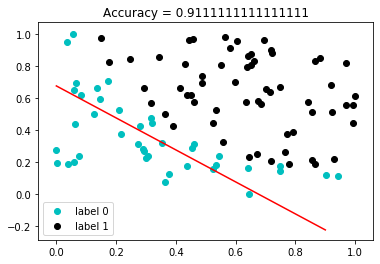

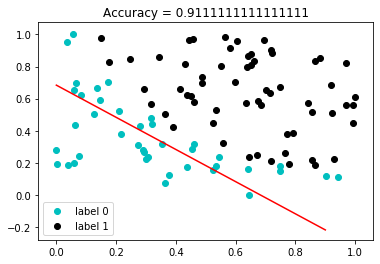

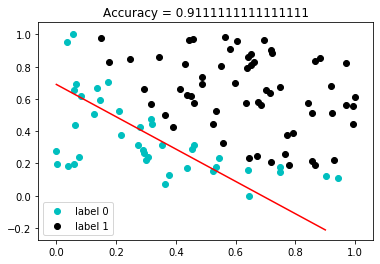

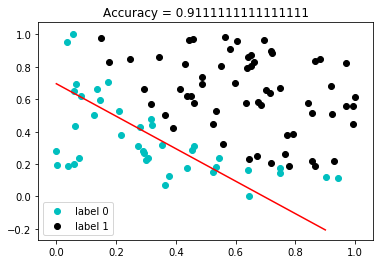

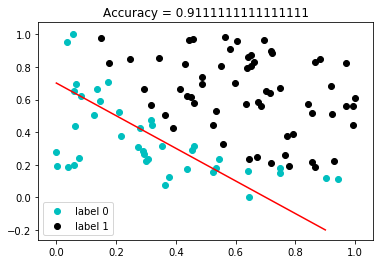

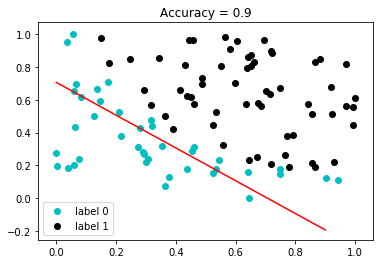

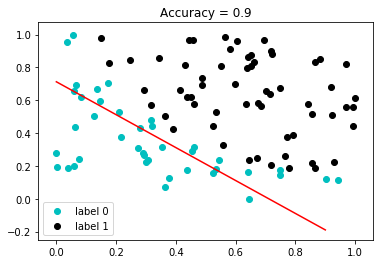

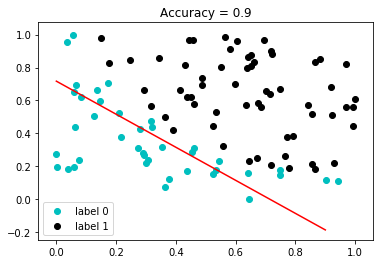

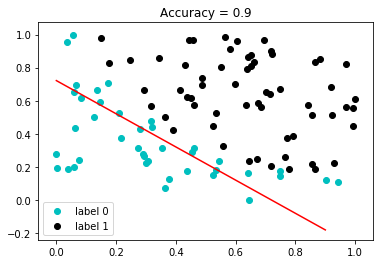

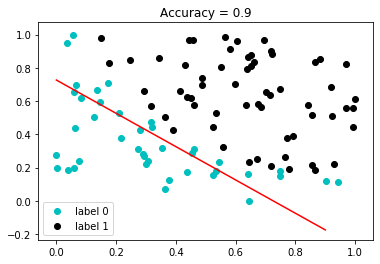

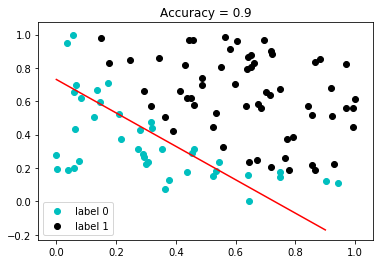

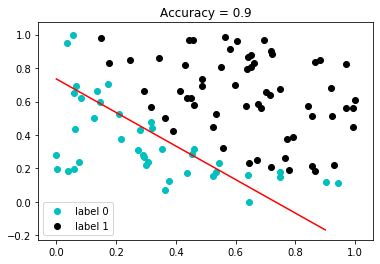

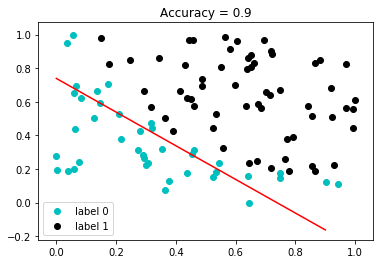

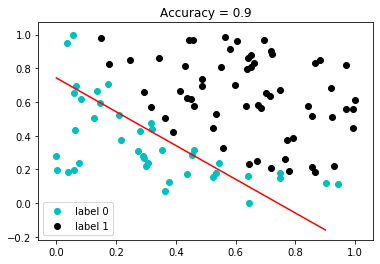

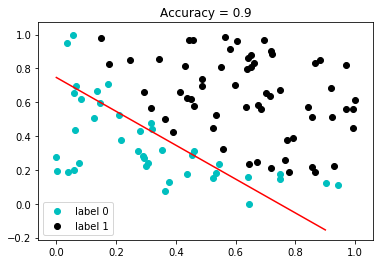

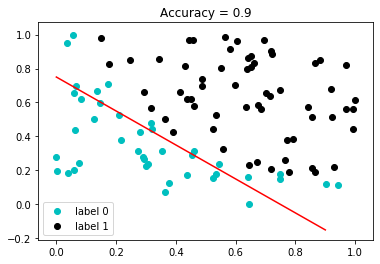

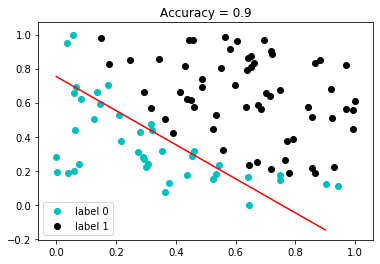

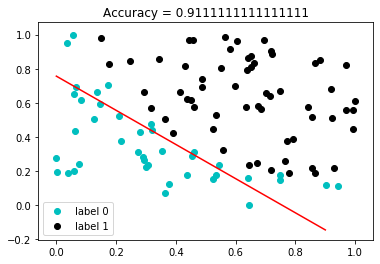

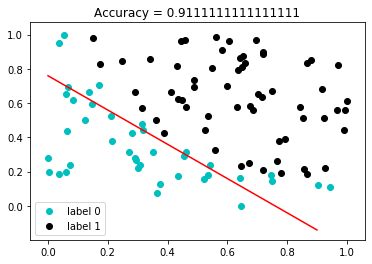

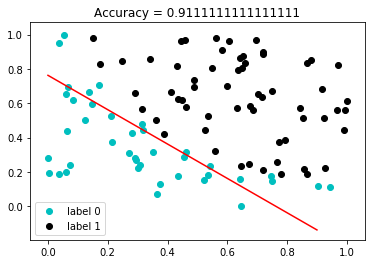

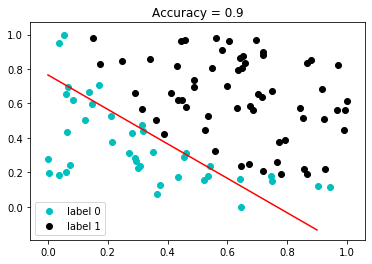

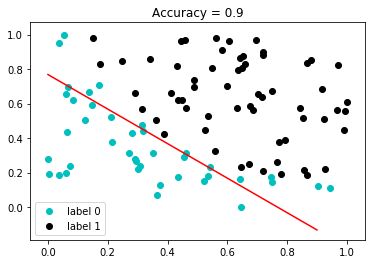

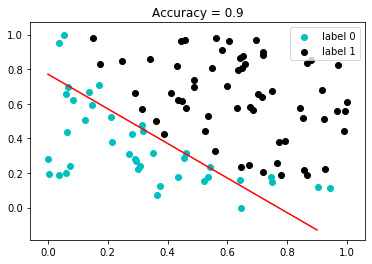

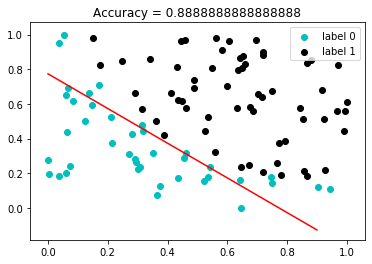

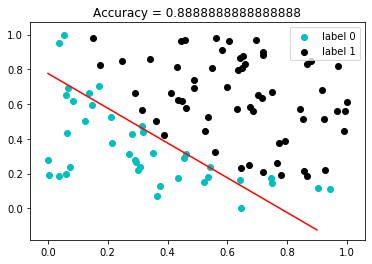

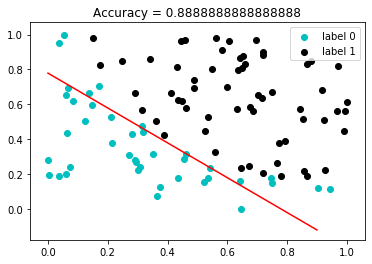

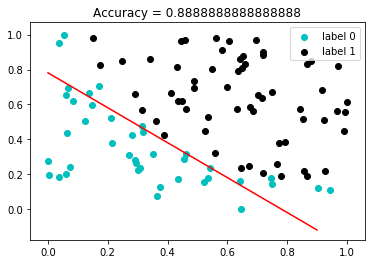

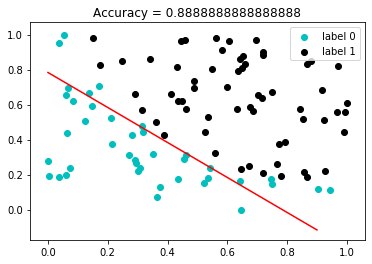

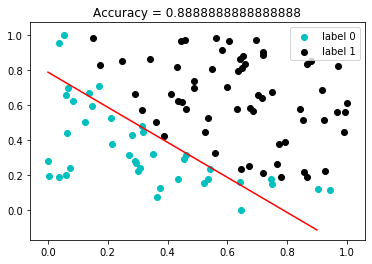

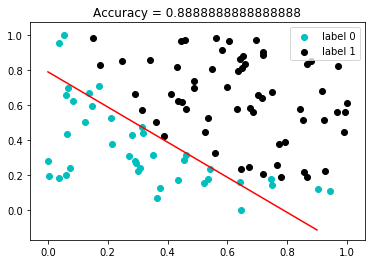

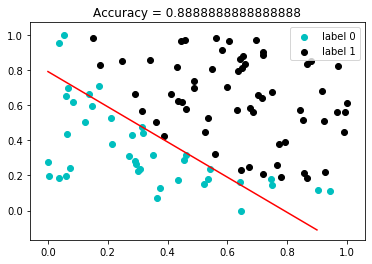

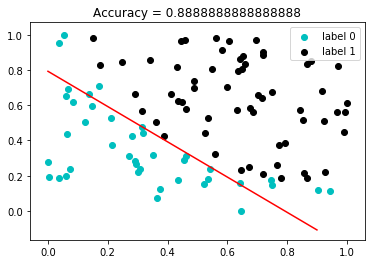

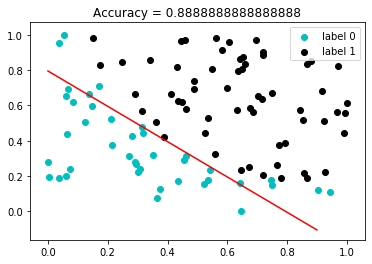

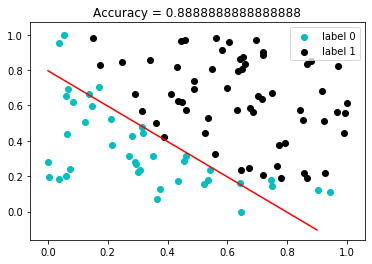

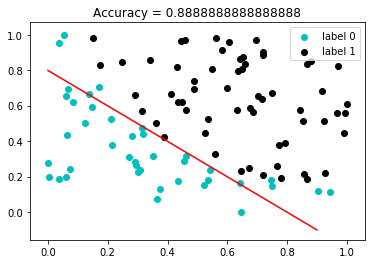

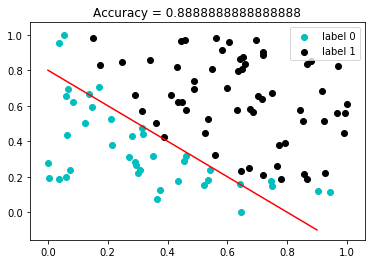

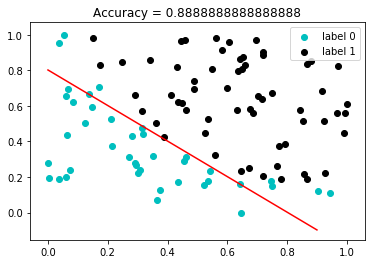

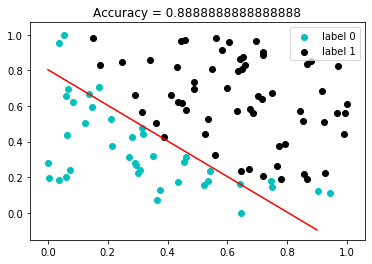

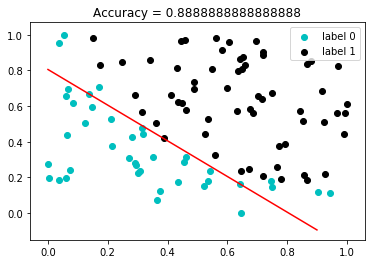

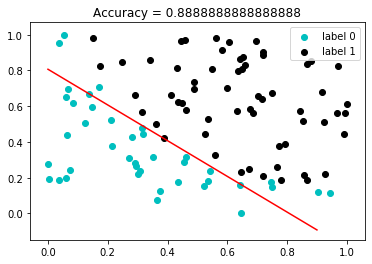

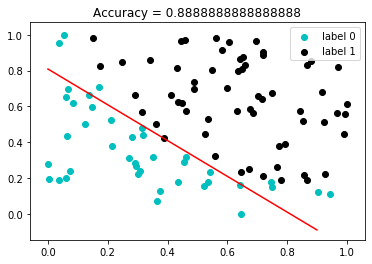

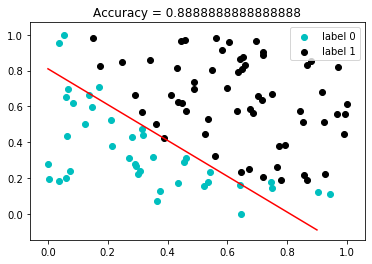

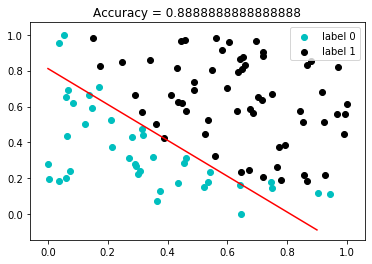

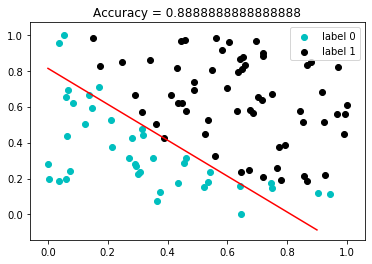

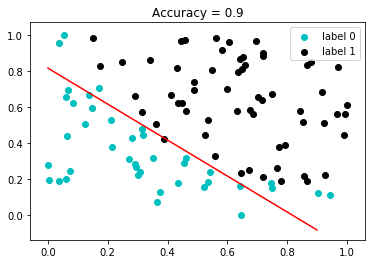

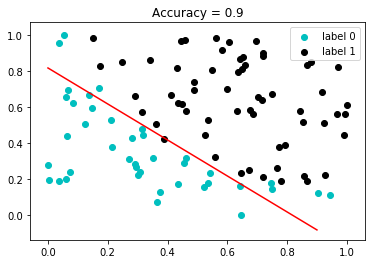

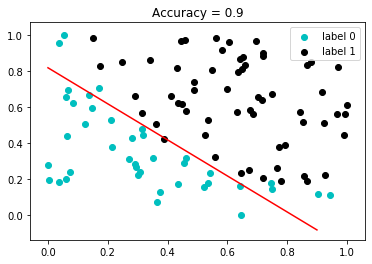

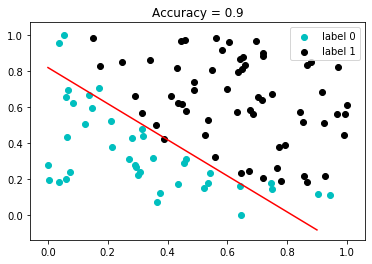

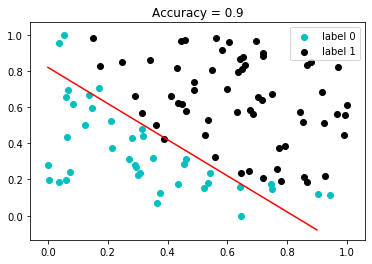

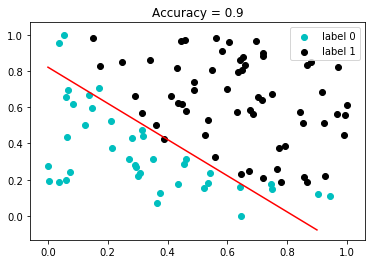

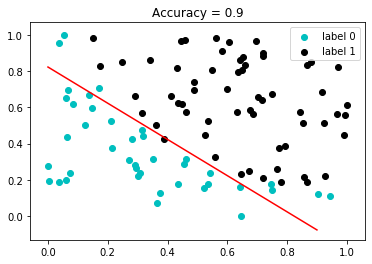

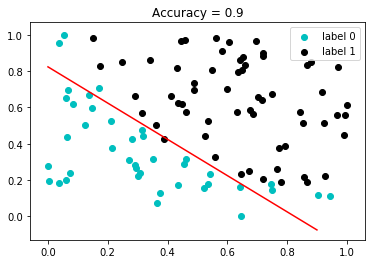

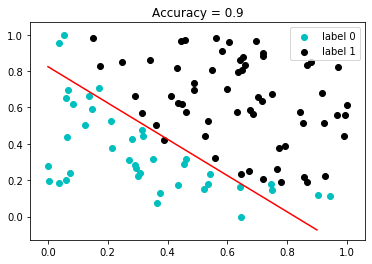

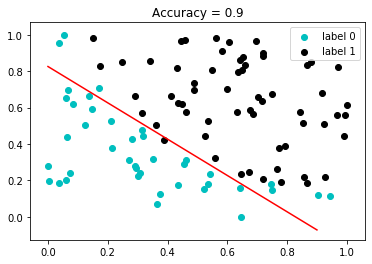

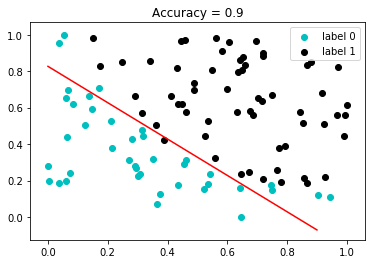

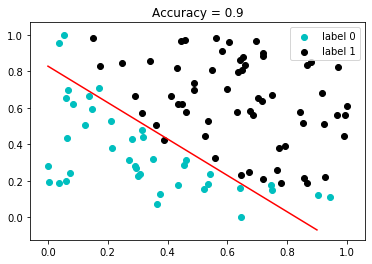

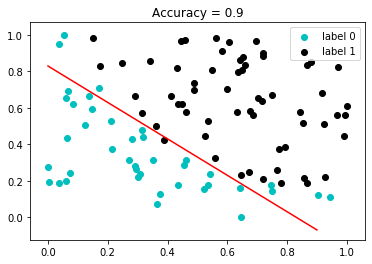

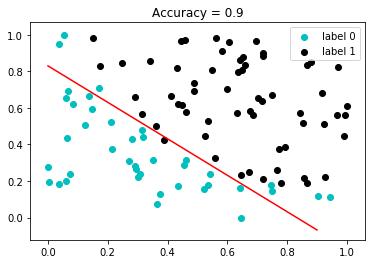

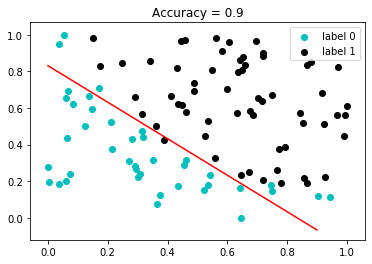

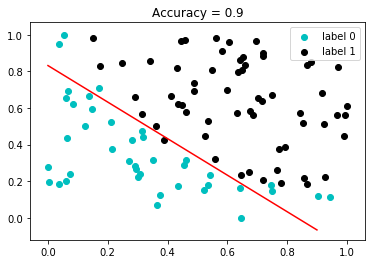

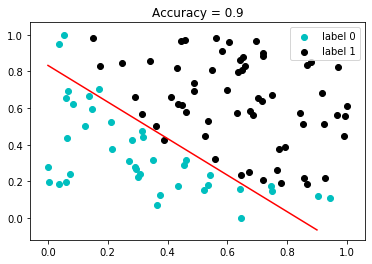

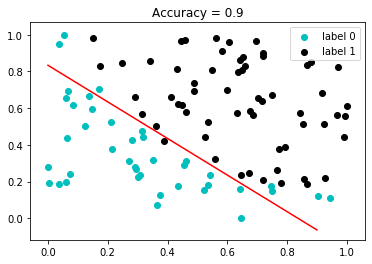

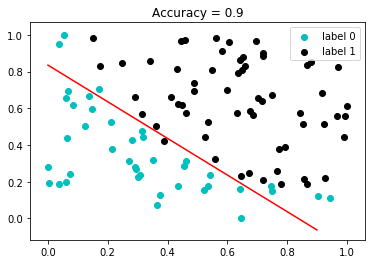

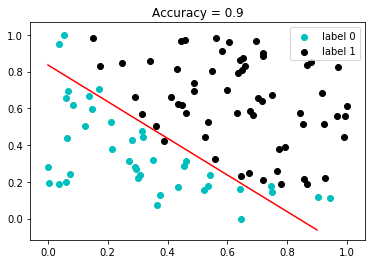

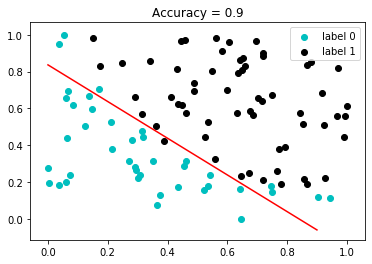

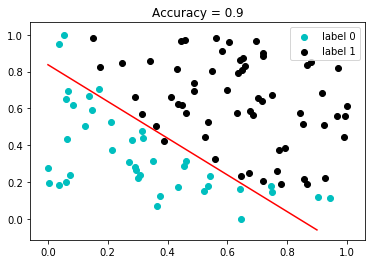

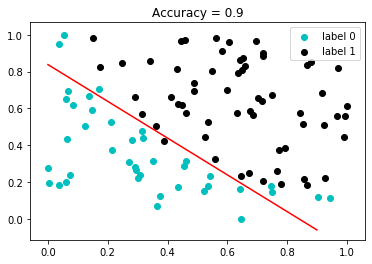

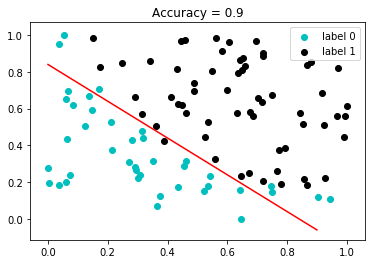

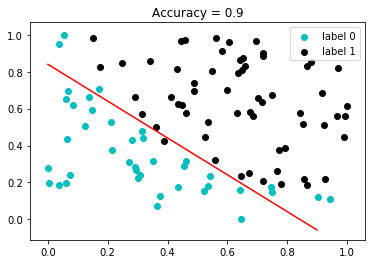

In [10]:
df1_norm = data[data['label'] == 0]
df2_norm = data[data['label'] == 1]
x = np.arange(0,1,0.1)

for i in range(0,1000,10):
    accu = acc_train[i]
    plt.scatter(df1_norm.feature1[:],df1_norm.feature2[:],
                c='c',marker='o',label='label 0')
    plt.scatter(df2_norm.feature1[:],df2_norm.feature2[:],
                c='k',marker='o',label='label 1')
    y = (-float(w_all[i][0,0]) * x - float(w_all[i][0,2]))/float(w_all[i][0,1])

    plt.plot(x, y, c='r')
    plt.legend()
    plt.title('Accuracy = '+str(accu))
    plt.savefig(r'./pic2/'+str(i)+'.png', dpi=300)

    plt.show()

## Draw plots

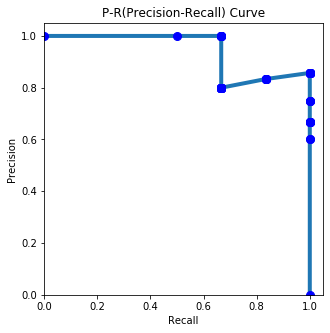

In [11]:
# 1. P-R curve(Precision and Recall)

# true_pos, false_neg, false_pos, true_neg = performance_measure(label_all, final_label)
true_pos, false_neg, false_pos, true_neg = performance_measure(label_alltrain_measure, training_set[:,2])

# Let NaN in the array be 0
np.seterr(divide='ignore',invalid='ignore')

precision = true_pos/(true_pos + false_pos)
recall = true_pos/(true_pos + false_neg)

precision[np.isnan(precision)]=0

precs_draw = np.zeros(len(precision))

for i in range(1,len(precision)):
    if precision[i] != 0:
        precs_draw[i] = precision[i]
    else:
        precs_draw[i] = 1

# Add point to draw plot
recall[len(recall)-2] = 0.5
recall[len(recall)-1] = 0


# Draw scatter
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(
#     recall, precision, "-o",
    recall, precs_draw, "-o",
    markersize=8,
    linewidth=4,
    markerfacecolor="b",
    markeredgecolor="b",
    markeredgewidth=1
)
ax.set(xlim=[0, 1.05], ylim=[0, 1.05], title='P-R(Precision-Recall) Curve',
       ylabel='Precision', xlabel='Recall')
plt.show()

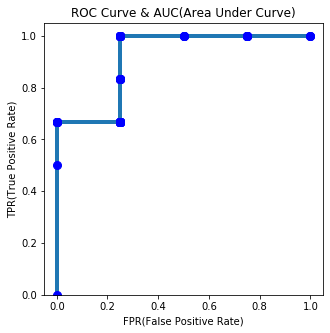

AUC is 0.92


In [12]:
# 2. AUC curve(Area Under Curve)
# The area between the ROC curve and the coordinate axis

TPR = true_pos/(true_pos + false_neg)
FPR = false_pos/(true_neg + false_pos)

# Add point to draw plot
TPR[len(TPR)-2] = 0.5
TPR[len(TPR)-1] = 0

# Draw scatter
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(
    FPR, TPR, "-o",
    markersize=8,
    linewidth=4,
    markerfacecolor="b",
    markeredgecolor="b",
    markeredgewidth=1
)
ax.set(xlim=[-0.05, 1.05], ylim=[0, 1.05], title='ROC Curve & AUC(Area Under Curve)',
       ylabel='TPR(True Positive Rate)', xlabel='FPR(False Positive Rate)')

plt.show()

# Calculate AUC
temp = 0
for i in range(len(FPR)-1):
    temp = temp + (FPR[i] - FPR[i+1]) * (TPR[i] + TPR[i+1])
AUC = float(0.5*temp)
print('AUC is %.2f' %AUC)

In [13]:
end = time.time()
t = end - start
print('Run time: %.2f s' %t)

Run time: 38.25 s
